In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


(714,)


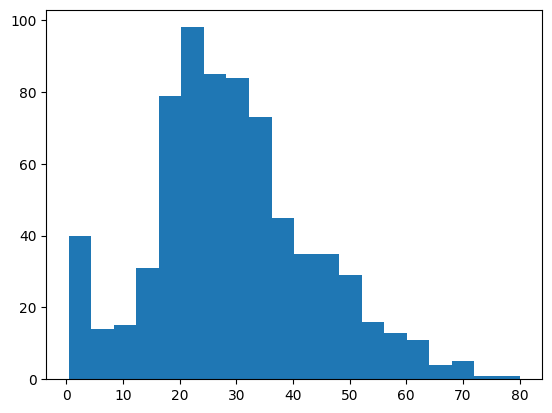

Wiek średni: 30.0


In [2]:
# Dane z kolumy age bez wartości brakujących i przypisanue do zmiennej age

age_values = dataset.loc[dataset['Age'].notnull(), 'Age'].values
# .loc[] - wybiera wiersze i kolumny z DataFrame na podstawie etykiet
# .notnull() - zwraca maskę booleanową, która jest True dla wartości niepustych
print(age_values.shape)

# tworzenie histogramu z wartościami wieku
plt.hist(age_values, bins=20)
plt.show()

# policzenie średnie dla tego zbioru
mean_age = np.round(np.mean(age_values))
# np.mean() - zwraca średnią arytmetyczną wartości w tablicy
# np.round() - zaokrągla wartości do najbliższej liczby całkowitej
print(f'Wiek średni: {mean_age}')

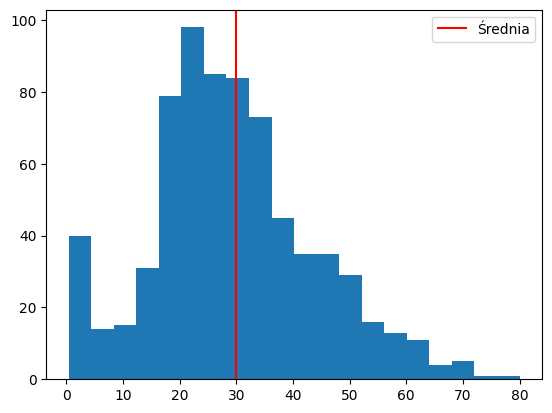

In [3]:
# Tworzenie historgrau z naniesieniem wartosco sredniej wieku

plt.hist(age_values, bins=20)
plt.axvline(mean_age, color='red', label='Średnia')
# axvline() - rysuje pionową linię na wykresie
# label - etykieta dla linii, która będzie wyświetlana w legendzie
plt.legend(loc='upper right')
#loc - lokalizacja legendy
plt.show()

Wiek mediany: 28.0


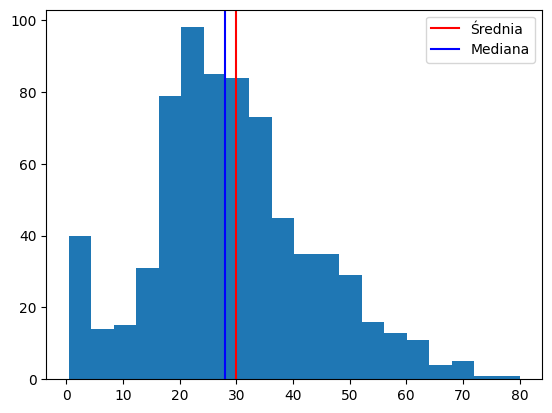

In [4]:
# Policzenie mediany wieku pasażerów Titanica
median_age = np.round(np.median(age_values))
# np.median() - zwraca medianę wartości w tablicy
print(f'Wiek mediany: {median_age}')

# Tworzenie histogramu z naniesieniem wartosci mediany wieku i sredniej wieku
plt.hist(age_values, bins=20)
plt.axvline(mean_age, color='red', label='Średnia')
plt.axvline(median_age, color='blue', label='Mediana')
plt.legend(loc='upper right')
plt.show()

ModeResult(mode=np.float64(24.0), count=np.int64(30))


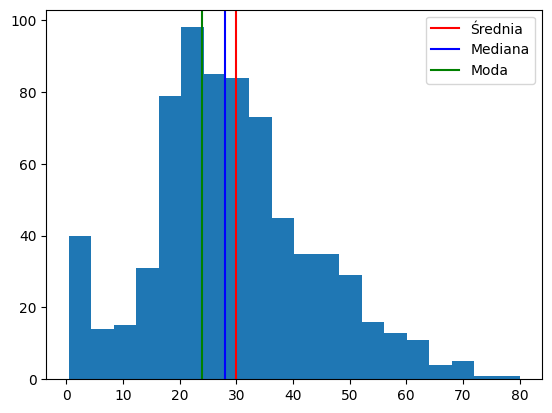

In [5]:
# Moda - najczęściej występująca wartość w zbiorze danych moduł stats

mode_age = stats.mode(age_values)
# stats.mode() - zwraca najczęściej występującą wartość w tablicy
print(mode_age)
# mode_age[0] - zwraca wartość najczęściej występującą w tablicy
# count - zwraca liczbę wystąpień tej wartości w tablicy

# Tworzenie histogramu z naniesieniem wartosci modalu wieku, mediany i sredniej wieku
plt.hist(age_values, bins=20)
plt.axvline(mean_age, color='red', label='Średnia')
plt.axvline(median_age, color='blue', label='Mediana')
plt.axvline(mode_age[0], color='green', label='Moda')
plt.legend(loc='upper right')
plt.show()

Q0: 0.42, Q1: 20.125, Q2: 28.0, Q3: 38.0, Q4: 80.0


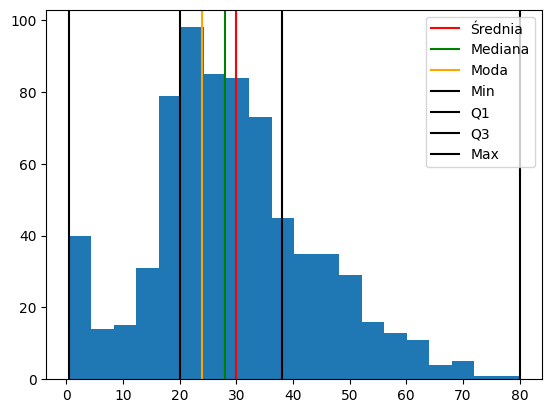

In [6]:
# Kwartyle - wartości dzielące zbiór danych na cztery równe części

# Policzenie kwartyli dla zmiennej wiek, Q2 jest medianą

q0 = np.quantile(age_values, 0.0)
q1 = np.quantile(age_values, 0.25)
q2 = np.quantile(age_values, 0.5)
q3 = np.quantile(age_values, 0.75)
q4 = np.quantile(age_values, 1.0)
# np.quantile() - zwraca wartość kwartyla dla podanego poziomu
print(f'Q0: {q0}, Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}')
# decyli - wartości dzielące zbiór danych na dziesięć równych części

# Tworzenie histogramu z naniesieniem wartosci kwartyli wieku

plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.axvline(x = mode_age[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [7]:
# Zakres - różnica między maksymalną a minimalną wartością w zbiorze danych
range_age = np.max(age_values) - np.min(age_values)
# np.max() - zwraca maksymalną wartość w tablicy
# np.min() - zwraca minimalną wartość w tablicy
print(f'Zakres wieku: {range_age}')

Zakres wieku: 79.58


Rozstęp międzkwartylowy: 18


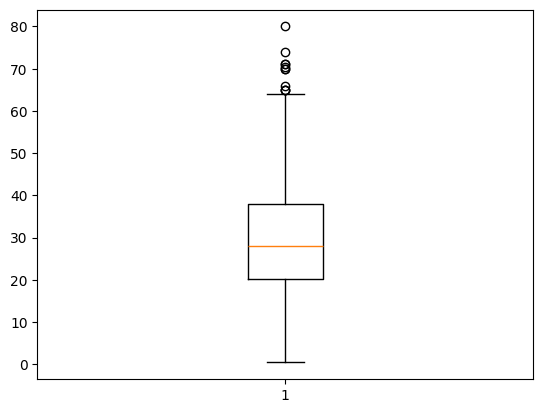

In [8]:
# Rozstęp międzkwartylowy - różnica między trzecim a pierwszym kwartylem
iqr_age = q3 - q1
# iqr - interquartile range
print(f'Rozstęp międzkwartylowy: {round(iqr_age)}')

# Wykres pudełkowy dla zmiennej wiek
plt.boxplot(age_values)
plt.show()

In [9]:
# Wariancja - miara rozproszenia wartości w zbiorze danych
variance_age = np.var(age_values, ddof=1)
# np.var() - zwraca wariancję wartości w tablicy
# ddof=1 - oznacza, że używamy wzoru na wariancję dla próby (n-1)
print(f'Wariancja wieku: {round(variance_age)}')

Wariancja wieku: 211


In [11]:
# Odchylenie standardowe - pierwiastek kwadratowy z wariancji
import numpy as np

standard_deviation_age = np.std(age_values, ddof=1)
print(standard_deviation_age)
# np.std() - zwraca odchylenie standardowe wartości w tablicy

#Możemy obliczyć to jako pierwiastek poprzedniego działania.
print(variance_age**(1/2))


14.526497332334042
14.526497332334042


In [ ]:
# Asymetria rozkładu - miara asymetrii rozkładu wartości w zbiorze danych